## Longines is a Swiss watch making company. When my cousin asked me for Longines watch recommendations I later became interested in their watch selections for data science side project. Is it possible to built an appraisal formula for all the Longines watches based on a set of physical characteristics (watch size, material, gender, etc.)?
### Summary: the webpage containing all Longines watches is: https://www.longines.com/watches/selector . However, to display the watch prices (MSRP, actually), the users have to manually click each of the 1510 watch links. Selenium webdriver is needed to scroll through the catalogue in order to render all watches. Then bs4 was used to extract physical attributes of each watch.
### I expect luxury items such as Longines watches won't be easily appraised w/ just the quantifiable/label data. Fashion, marketing, associated celebrities, design, supply & demand are factors not considered in this data mining & machining learning project. So it may be better not to overcomplicate the modeling.
### _____________________________________________
### Appraisal function at the end of this document.

## Import modules

In [1]:
from urllib import request
import urllib
import certifi
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.touch_actions import TouchActions
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import time
from IPython.display import clear_output
from tqdm import tqdm_notebook as tqdm
import random
import base64

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from tqdm import tqdm_notebook as tqdm

%matplotlib inline
print('All modules imported!')

All modules imported!


In [2]:
class longines(object):
    def __init__(self,
                 width,
                 case,
                 case_material,
                 diamond = 'nodiamonds',
                 bracelet = 'metal',
                 water_resist = '3bar',
                 movement = 'automatic',
                 dial_color = 'yellow',
                 gender = 'men'): # default these parameters to limit # of watches found. These parameters are customizable. Acceptable parameter choices can be found in the filter section at https://www.longines.com/watches/selector
        self.width = width
        self.bracelet = bracelet
        self.water_resist = water_resist
        self.diamond = diamond
        self.dial_color = dial_color
        self.movement = movement
        self.case = case
        self.case_material = case_material
        
        self.chrome_options = Options()
        self.chrome_options.add_argument('--headless')
        self.chrome_options.add_argument('--disable-gpu')
        self.driver = webdriver.Chrome('/Users/zhonggao/Documents/Jupyter/chromedriver', options=self.chrome_options) # Change this to actual location of chromedriver file
        self.url_unrefined = f'https://www.longines.com/watches/selector/{case_material}/{case}/{movement}/{dial_color}/{diamond}/{water_resist}/{bracelet}/{width}/{gender}'
        
        def single_slash (url):
            for i in range(len(url)):
                if i == (len(url) - 1):
                    return url
                elif (url[i] == url[i + 1]) and (url[i] == '/') and (url[i - 1] != ':'):
                    return single_slash(url[:i] + url[i + 1:])
        
        self.url = single_slash(self.url_unrefined)
        
        self.delay = 3
        self.sleep_time = 3
        self.wait_load = 0.5 # 
        
    def print_url(self):
        print(self.url)

    def extract(self):
        def make_table(self):
            self.watch_models = []
            self.watch_names = []
            self.urls = []
            self.msrp = []
            self.case_shape = []
            self.case_material = []
            self.case_glass = []
            self.case_case_back = []
            self.case_dimension = []
            self.case_water_resistance = []
            self.dial_color = []
            self.dial_hour_markers = []
            self.dial_hands = []
            self.mvt_fct_type = []
            self.mvt_fct_calibre_name = []
            self.mvt_fct_calibre = []
            self.mvt_fct_functions = []
            self.bracelet_material = []
            self.bracelet_buckle = []

            basic_dict = {'Model': self.watch_models,
                          'Name': self.watch_names,
                          'MSRP': self.msrp}

            extras_dict = {'case_shape': self.case_shape,
                           'case_material': self.case_material,
                           'case_glass': self.case_glass,
                           'case_case_back': self.case_case_back,
                           'case_dimension': self.case_dimension,
                           'case_water_resistance': self.case_water_resistance,
                           'dial_color': self.dial_color,
                           'dial_hour_markers': self.dial_hour_markers,
                           'dial_hands': self.dial_hands,
                           'mvt_fct_type': self.mvt_fct_type,
                           'mvt_fct_calibre_name': self.mvt_fct_calibre_name,
                           'mvt_fct_calibre': self.mvt_fct_calibre,
                           'mvt_fct_functions': self.mvt_fct_functions,
                           'bracelet_material': self.bracelet_material,
                           'bracelet_buckle': self.bracelet_buckle,
                           'URL': self.urls}

            combined_dict = dict(basic_dict, **extras_dict)
            
            pbar_watch_details = tqdm(total = total_informed)
            pbar_watch_details.set_description_str('Searching watch details...')
            
            for model in self.soup.findAll('div', {'class': 'ref'}):
                watch_model = model.contents[0]
                self.watch_models.append(watch_model)

            for name in self.soup.findAll('div', {'class': 'name'}):
                watch_name = name.contents[0].strip()
                if watch_name != '':
                    self.watch_names.append(watch_name)

            for link in self.soup.findAll('div', {'class': 'watch-wrapper'}):
                for j in link.findAll('a'):
                    time.sleep(self.wait_load)
                    watch_link = 'https://www.longines.com/' + j.get('href')
                    self.urls.append(watch_link)
                    watch_url_auth = request.Request(watch_link, headers = {'User-Agent': 'Chrome/51.0.2704.103'})
                    watch_url_page = request.urlopen(watch_url_auth).read()
                    watch_soup = BeautifulSoup(watch_url_page, 'lxml')
                    pbar_watch_details.update(1)

                    for div_object in watch_soup.findAll('div', {'class': 'button small prices-price'}):
                        watch_price = div_object.span.contents[0]
                        self.msrp.append(watch_price)

                    for key in extras_dict:
                        if key != 'URL':
                            try:
                                attribute_container = watch_soup.find('li', {'data-pimkey': key})
                                if attribute_container == None:
#                                     print('warning: ', watch_link, ' has blank web element w/ data-pimkey: ', key)
                                    extras_dict[key].append('-')
                                else:
                                    content = attribute_container.contents[1]
                                    extras_dict[key].append(content)
                            except:
#                                 print('warning: ', watch_link, ' missing this web element w/ data-pimkey: ', key)
                                extras_dict[key].append('-')

            pbar_watch_details.update(1)
            pbar_watch_details.close()
            print('Searching watches completed.')
            global watch_table
            self.watch_table = pd.DataFrame(data = combined_dict)
        
        url_auth = request.Request(self.url, headers = {'User-Agent': 'Chrome/41.0.2228.0'})
        url_page = request.urlopen(url_auth).read()
        self.soup = BeautifulSoup(url_page, 'lxml')
        self.driver.get(self.url)
        
        watches_url = self.driver.page_source
        self.soup = BeautifulSoup(watches_url, 'lxml')
        try:
            wait = WebDriverWait(self.driver, self.delay)
            wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="body-content"]/div[3]/div/div[3]/div[1]')))
            time.sleep(self.sleep_time)
            self.driver.find_element_by_xpath('//*[@id="body-content"]/div[3]/div/div[3]/div[1]').click()
            time.sleep(self.sleep_time)
            print('Webpage is initiated.')
            footer_element = self.driver.find_element_by_xpath('//*[@id="footer-wrapper"]')
            footer_element.location_once_scrolled_into_view
            time.sleep(self.sleep_time)

            total_informed = int(self.driver.find_element_by_class_name('number').text)
            displayed_watches = len(self.driver.find_elements_by_class_name('text-watch'))
            pbar_load_watches = tqdm(total = total_informed)
            pbar_load_watches.set_description_str('Displaying watches...')
            pbar_load_watches.update(displayed_watches)
            self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
            while True:
                time.sleep(random.randint(2,3))
                n_displayed_watches = len(self.driver.find_elements_by_class_name('text-watch'))
                pbar_load_watches.update(n_displayed_watches - displayed_watches)
                displayed_watches = n_displayed_watches
                
                if n_displayed_watches == total_informed:
                    watches_url = self.driver.page_source
                    self.soup = BeautifulSoup(watches_url, 'lxml')
                    pbar_load_watches.update(n_displayed_watches - displayed_watches)
                    displayed_watches = n_displayed_watches
                    self.displayed_items = []
                    for item in self.driver.find_elements_by_class_name('text-watch'):
                        self.displayed_items.append(item.text)
                    break
            
            pbar_load_watches.close()
            self.driver.close()

        except TimeoutException:
            print('Page not loaded in ChromeDriver (Timeout).')
        
        make_table(self)
        return self.watch_table.head()

## To search for all 1510 Longines watches, the following code was run.
## However, not all watches specify if they're designed for men or women. In fact, some watches are unisex.

In [38]:
all_watches = longines(width='',
                 case='',
                 case_material='',
                 diamond = '',
                 bracelet = '',
                 water_resist = '',
                 movement = '',
                 dial_color = '',
                 gender = '')

all_watches.extract()

,Model,Name,MSRP,case_shape,case_material,case_glass,case_case_back,case_dimension,case_water_resistance,dial_color,dial_hour_markers,dial_hands,mvt_fct_type,mvt_fct_calibre_name,mvt_fct_calibre,mvt_fct_functions,bracelet_material,bracelet_buckle,URL
0,l4.974.4.11.6,Flagship,"$ 1,600.00",Round,Stainless steel,"Scratch-resistant sapphire crystal, with sever...",Transparent case back with sapphire crystal,Ø 38.50 mm,Water-resistant to 3 bar,White matt,Painted Roman numerals,Silvered polished hands,Automatic,L619/888,Self winding mechanical movement beating at 25...,"Hours, minutes, seconds and date",Stainless steel,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/flagship/l4-9...
1,l4.908.4.97.6,La Grande Classique de Longines,"$ 1,875.00",Round,Stainless steel,Scratch-resistant sapphire crystal,Transparent case back with sapphire crystal,Ø 36.00 mm,Water-resistant to 3 bar,Sunray blue,Diamond indexes,Silvered polished hands,Automatic,L591,Self winding mechanical movement beating at 28...,Hours and minutes,Stainless steel,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/grande-classi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,l4.512.1.91.7,La Grande Classique de Longines,"$ 1,300.00",Round,Red PVD coating,Scratch-resistant sapphire crystal,-,Ø 29.00 mm,Water-resistant to 3 bar,White,Painted Roman numerals,Black hands,Quartz,L420,-,Hours and minutes,Stainless steel and red PVD coating,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/grande-classi...
1509,l4.512.1.91.2,La Grande Classique de Longines,"$ 1,250.00",Round,Red PVD coating,Scratch-resistant sapphire crystal,-,Ø 29.00 mm,Water-resistant to 3 bar,White,Painted Roman numerals,Black hands,Quartz,L420,-,Hours and minutes,Alligator strap,With buckle,https://www.longines.com/watches/grande-classi...


## In order to have gender info in the learning data set for machine learning, we need to use Longines' built-in filter to search for men & women watches separately.
## Watches for ladies:

In [56]:
pd.set_option('display.max_rows', 5)

women_watches = longines(width='',
                 case='',
                 case_material='',
                 diamond = '',
                 bracelet = '',
                 water_resist = '',
                 movement = '',
                 dial_color = '',
                 gender = 'women')

women_watches.extract()

,Model,Name,MSRP,case_shape,case_material,case_glass,case_case_back,case_dimension,case_water_resistance,dial_color,dial_hour_markers,dial_hands,mvt_fct_type,mvt_fct_calibre_name,mvt_fct_calibre,mvt_fct_functions,bracelet_material,bracelet_buckle,URL
0,l8.116.4.87.6,Longines PrimaLuna,"$ 1,500.00",Round,Stainless steel,"Scratch-resistant sapphire crystal, with sever...",-,Ø 34.00 mm,Water-resistant to 3 bar,White mother-of-pearl,Diamond indexes,Blued steel hands,Quartz,L296,-,"Hours, minutes, seconds and date. Moon phase d...",Stainless steel,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/primaluna/l8-...
1,l4.274.4.11.6,Flagship,"$ 1,450.00",Round,Stainless steel,"Scratch-resistant sapphire crystal, with sever...",Transparent case back with sapphire crystal,Ø 26.00 mm,Water-resistant to 3 bar,White matt,Painted Roman numerals,Silvered polished hands,Automatic,L595/592,Self winding mechanical movement beating at 28...,"Hours, minutes, seconds and date",Stainless steel,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/flagship/l4-2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,l4.512.1.91.7,La Grande Classique de Longines,"$ 1,300.00",Round,Red PVD coating,Scratch-resistant sapphire crystal,-,Ø 29.00 mm,Water-resistant to 3 bar,White,Painted Roman numerals,Black hands,Quartz,L420,-,Hours and minutes,Stainless steel and red PVD coating,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/grande-classi...
751,l4.512.1.91.2,La Grande Classique de Longines,"$ 1,250.00",Round,Red PVD coating,Scratch-resistant sapphire crystal,-,Ø 29.00 mm,Water-resistant to 3 bar,White,Painted Roman numerals,Black hands,Quartz,L420,-,Hours and minutes,Alligator strap,With buckle,https://www.longines.com/watches/grande-classi...


In [57]:
pd.set_option('display.max_rows', 50)
MSRP_int = []

for i in women_watches.watch_table.iterrows():
    MSRP_int.append(int((str(i[1]['MSRP']))[2:].replace(',','').replace('.00','')))
    
women_watches.watch_table['MSRP_int'] = MSRP_int
women_watches.watch_table.sort_values(by=['MSRP_int'], ascending=True)

,Model,Name,MSRP,case_shape,case_material,case_glass,case_case_back,case_dimension,case_water_resistance,dial_color,dial_hour_markers,dial_hands,mvt_fct_type,mvt_fct_calibre_name,mvt_fct_calibre,mvt_fct_functions,bracelet_material,bracelet_buckle,URL,MSRP_int
386,l4.319.4.11.2,Présence,$ 750.00,Round,Stainless steel,Scratch-resistant sapphire crystal,-,Ø 23.50 mm,Water-resistant to 3 bar,White matt,Painted Roman numerals,Black hands,Quartz,L152,-,"Hours, minutes, seconds and date",Leather strap,With buckle,https://www.longines.com/watches/presence/l4-3...,750
522,l3.376.4.16.6,Conquest,$ 750.00,Round,Stainless steel,Scratch-resistant sapphire crystal with anti-r...,Screw-down case back,Ø 29.50 mm,Water-resistant to 30 bar,White matt,Applied Arabic numerals and indexes,Silvered polished hands,Quartz,L152,-,"Hours, minutes, seconds and date",Stainless steel,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/conquest/l3-3...,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,l7.034.8.11.1,Equestrian,"$ 52,500.00",Round,18 karat pink gold,"Scratch-resistant sapphire crystal, with sever...",-,Ø 48.00 mm,-,White lacquered polished,Painted Roman numerals,Pink hands,Mechanical,L512,Mechanical movement with manual winding beatin...,"Hours, minutes, small seconds at 6 o'clock",-,-,https://www.longines.com/watches/the-longines-...,52500
700,l7.037.8.13.1,Equestrian,"$ 52,500.00",Round,18 karat pink gold,"Scratch-resistant sapphire crystal, with sever...",-,Ø 48.75 mm,-,White lacquered polished,Painted Arabic numerals,Blued steel hands,Mechanical,L506,Mechanical movement with manual winding beatin...,"Hours, minutes, small seconds at 6 o'clock",-,-,https://www.longines.com/watches/the-longines-...,52500


## Watches for men

In [49]:
men_watches = longines(width='',
                 case='',
                 case_material='',
                 diamond = '',
                 bracelet = '',
                 water_resist = '',
                 movement = '',
                 dial_color = '',
                 gender = 'men')

men_watches.extract()

,Model,Name,MSRP,case_shape,case_material,case_glass,case_case_back,case_dimension,case_water_resistance,dial_color,dial_hour_markers,dial_hands,mvt_fct_type,mvt_fct_calibre_name,mvt_fct_calibre,mvt_fct_functions,bracelet_material,bracelet_buckle,URL
0,l4.974.4.11.6,Flagship,"$ 1,600.00",Round,Stainless steel,"Scratch-resistant sapphire crystal, with sever...",Transparent case back with sapphire crystal,Ø 38.50 mm,Water-resistant to 3 bar,White matt,Painted Roman numerals,Silvered polished hands,Automatic,L619/888,Self winding mechanical movement beating at 25...,"Hours, minutes, seconds and date",Stainless steel,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/flagship/l4-9...
1,l4.908.4.97.6,La Grande Classique de Longines,"$ 1,875.00",Round,Stainless steel,Scratch-resistant sapphire crystal,Transparent case back with sapphire crystal,Ø 36.00 mm,Water-resistant to 3 bar,Sunray blue,Diamond indexes,Silvered polished hands,Automatic,L591,Self winding mechanical movement beating at 28...,Hours and minutes,Stainless steel,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/grande-classi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,l4.512.1.91.7,La Grande Classique de Longines,"$ 1,300.00",Round,Red PVD coating,Scratch-resistant sapphire crystal,-,Ø 29.00 mm,Water-resistant to 3 bar,White,Painted Roman numerals,Black hands,Quartz,L420,-,Hours and minutes,Stainless steel and red PVD coating,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/grande-classi...
823,l4.512.1.91.2,La Grande Classique de Longines,"$ 1,250.00",Round,Red PVD coating,Scratch-resistant sapphire crystal,-,Ø 29.00 mm,Water-resistant to 3 bar,White,Painted Roman numerals,Black hands,Quartz,L420,-,Hours and minutes,Alligator strap,With buckle,https://www.longines.com/watches/grande-classi...


In [54]:
pd.set_option('display.max_rows', 50)
MSRP_int = []

for i in men_watches.watch_table.iterrows():
    MSRP_int.append(int((str(i[1]['MSRP']))[2:].replace(',','').replace('.00','')))
    
men_watches.watch_table['MSRP_int'] = MSRP_int
men_watches.watch_table.sort_values(by=['MSRP_int'], ascending=True)

,Model,Name,MSRP,case_shape,case_material,case_glass,case_case_back,case_dimension,case_water_resistance,dial_color,dial_hour_markers,dial_hands,mvt_fct_type,mvt_fct_calibre_name,mvt_fct_calibre,mvt_fct_functions,bracelet_material,bracelet_buckle,URL,MSRP_int
420,l4.819.4.12.2,Présence,$ 750.00,Round,Stainless steel,Scratch-resistant sapphire crystal,-,Ø 33.00 mm,Water-resistant to 3 bar,White matt,Applied indexes,Black hands,Quartz,L157,-,"Hours, minutes, seconds and date",Leather strap,With buckle,https://www.longines.com/watches/presence/l4-8...,750
583,l3.759.4.76.6,Conquest,$ 750.00,Round,Stainless steel,Scratch-resistant sapphire crystal with anti-r...,Screw-down case back,Ø 41.00 mm,Water-resistant to 30 bar,Sunray silver,Applied Arabic numerals and indexes,Silvered polished hands,Quartz,L157,-,"Hours, minutes, seconds and date",Stainless steel,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/conquest/l3-7...,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,l7.034.8.11.1,Equestrian,"$ 52,500.00",Round,18 karat pink gold,"Scratch-resistant sapphire crystal, with sever...",-,Ø 48.00 mm,-,White lacquered polished,Painted Roman numerals,Pink hands,Mechanical,L512,Mechanical movement with manual winding beatin...,"Hours, minutes, small seconds at 6 o'clock",-,-,https://www.longines.com/watches/the-longines-...,52500
772,l7.037.8.13.1,Equestrian,"$ 52,500.00",Round,18 karat pink gold,"Scratch-resistant sapphire crystal, with sever...",-,Ø 48.75 mm,-,White lacquered polished,Painted Arabic numerals,Blued steel hands,Mechanical,L506,Mechanical movement with manual winding beatin...,"Hours, minutes, small seconds at 6 o'clock",-,-,https://www.longines.com/watches/the-longines-...,52500


## Unisex watches:

In [43]:
unisex_watch_table = men_watches.watch_table.merge(women_watches.watch_table, how='inner', indicator=False)
unisex_watch_table['Gender'] = 'MF'
unisex_watch_table

,Model,Name,MSRP,case_shape,case_material,case_glass,case_case_back,case_dimension,case_water_resistance,dial_color,...,dial_hands,mvt_fct_type,mvt_fct_calibre_name,mvt_fct_calibre,mvt_fct_functions,bracelet_material,bracelet_buckle,URL,MSRP_int,Gender
0,l4.523.0.97.6,La Grande Classique de Longines,"$ 3,450.00",Round,Stainless steel,Scratch-resistant sapphire crystal,-,Ø 29.00 mm,Water-resistant to 3 bar,Sunray blue,...,Silvered polished hands,Quartz,L420,-,Hours and minutes,Stainless steel,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/grande-classi...,3450,MF
1,l4.523.0.97.2,La Grande Classique de Longines,"$ 3,450.00",Round,Stainless steel,Scratch-resistant sapphire crystal,-,Ø 29.00 mm,Water-resistant to 3 bar,Sunray blue,...,Silvered polished hands,Quartz,L420,-,Hours and minutes,Alligator strap,With buckle,https://www.longines.com/watches/grande-classi...,3450,MF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,l4.512.1.91.7,La Grande Classique de Longines,"$ 1,300.00",Round,Red PVD coating,Scratch-resistant sapphire crystal,-,Ø 29.00 mm,Water-resistant to 3 bar,White,...,Black hands,Quartz,L420,-,Hours and minutes,Stainless steel and red PVD coating,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/grande-classi...,1300,MF
65,l4.512.1.91.2,La Grande Classique de Longines,"$ 1,250.00",Round,Red PVD coating,Scratch-resistant sapphire crystal,-,Ø 29.00 mm,Water-resistant to 3 bar,White,...,Black hands,Quartz,L420,-,Hours and minutes,Alligator strap,With buckle,https://www.longines.com/watches/grande-classi...,1250,MF


## Exclusively men watches

In [58]:
men_only_watch_table = pd.concat([men_watches.watch_table, unisex_watch_table.iloc[:, 0:20]]).drop_duplicates(keep = False)
men_only_watch_table['Gender'] = 'M'
men_only_watch_table.sort_values(by=['MSRP_int'], ascending=True)

,Unnamed: 0,Model,Name,MSRP,case_shape,case_material,case_glass,case_case_back,case_dimension,case_water_resistance,...,dial_hands,mvt_fct_type,mvt_fct_calibre_name,mvt_fct_calibre,mvt_fct_functions,bracelet_material,bracelet_buckle,URL,MSRP_int,Gender
586,652,l3.759.4.58.3,Conquest,$ 750.00,Round,Stainless steel,Scratch-resistant sapphire crystal with anti-r...,Screw-down case back,Ø 41.00 mm,Water-resistant to 30 bar,...,Silvered polished hands,Quartz,L157,-,"Hours, minutes, seconds and date",Leather strap,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/conquest/l3-7...,750,M
584,650,l3.759.4.76.5,Conquest,$ 750.00,Round,Stainless steel,Scratch-resistant sapphire crystal with anti-r...,Screw-down case back,Ø 41.00 mm,Water-resistant to 30 bar,...,Silvered polished hands,Quartz,L157,-,"Hours, minutes, seconds and date",Leather strap,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/conquest/l3-7...,750,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,729,l2.713.8.13.0,The Longines Weems Second-Setting Watch,"$ 16,500.00",Round,18 karat pink gold,"Scratch-resistant sapphire crystal, with sever...",Transparent case back with back cover,Ø 47.50 mm,Water-resistant to 3 bar,...,Blued steel hands,Automatic,L699,Self winding mechanical movement beating at 28...,"Hours, minutes, seconds, internal rotating sil...",Alligator strap,With buckle,https://www.longines.com/watches/heritage-coll...,16500,M
664,730,l2.713.8.11.0,The Longines Weems Second-Setting Watch,"$ 16,500.00",Round,18 karat pink gold,"Scratch-resistant sapphire crystal, with sever...",Transparent case back with back cover,Ø 47.50 mm,Water-resistant to 3 bar,...,Blued steel hands,Automatic,L699,Self winding mechanical movement beating at 28...,"Hours, minutes, seconds, internal rotating sil...",Alligator strap,With buckle,https://www.longines.com/watches/heritage-coll...,16500,M


## Exclusively lady watches

In [59]:
women_only_watch_table = pd.concat([women_watches.watch_table, unisex_watch_table.iloc[:, 0:20]]).drop_duplicates(keep = False)
women_only_watch_table['Gender'] = 'F'
women_only_watch_table.sort_values(by=['MSRP_int'], ascending=True)

,Unnamed: 0,Model,Name,MSRP,case_shape,case_material,case_glass,case_case_back,case_dimension,case_water_resistance,...,dial_hands,mvt_fct_type,mvt_fct_calibre_name,mvt_fct_calibre,mvt_fct_functions,bracelet_material,bracelet_buckle,URL,MSRP_int,Gender
1275,583,l3.377.4.16.6,Conquest,$ 750.00,Round,Stainless steel,"Scratch-resistant sapphire crystal, with sever...",Screw-down case back,Ø 34.00 mm,Water-resistant to 30 bar,...,Silvered polished hands,Quartz,L156,-,"Hours, minutes, seconds and date",Stainless steel,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/conquest/l3-3...,750,F
1277,585,l3.376.4.76.6,Conquest,$ 750.00,Round,Stainless steel,Scratch-resistant sapphire crystal with anti-r...,Screw-down case back,Ø 29.50 mm,Water-resistant to 30 bar,...,Silvered polished hands,Quartz,L152,-,"Hours, minutes, seconds and date",Stainless steel,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/conquest/l3-3...,750,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,499,l4.307.9.81.0,Agassiz,"$ 7,800.00",Round,18 karat pink gold,Scratch-resistant sapphire crystal,-,Ø 25.50 mm,Water-resistant to 3 bar,...,Black hands,Quartz,L209,-,Hours and minutes,Alligator strap,With buckle,https://www.longines.com/watches/agassiz/l4-30...,7800,F
1265,573,l4.191.6.11.6,Agassiz,"$ 8,725.00",Round,18 karat yellow gold,Scratch-resistant sapphire crystal,-,Ø 23.00 mm,Water-resistant to 3 bar,...,Black hands,Quartz,L209,-,Hours and minutes,18 karat yellow gold,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/agassiz/l4-19...,8725,F


## Compare overall statistical pictures of men-watches & lady-watches:

In [1166]:
men_only_description = men_only_watch_table.describe()
men_only_description.rename(columns={men_only_description.columns[0]: 'MSRP Men'}, inplace=True)
women_only_description = women_only_watch_table.describe()
women_only_description.rename(columns={women_only_description.columns[0]: 'MSRP Women'}, inplace=True)
comp = pd.concat([men_only_description, women_only_description], axis=1)
comp

,MSRP Men,MSRP Women
count,758.000000,686.000000
mean,2112.500000,2263.921283
std,1359.516673,1241.620557
min,750.000000,750.000000
25%,1350.000000,1275.000000
50%,1750.000000,1875.000000
75%,2425.000000,2900.000000
max,16500.000000,8725.000000


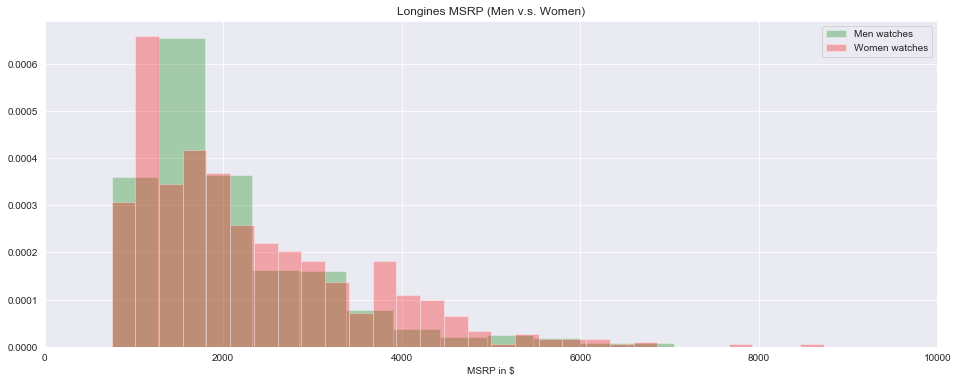

In [1165]:
plt.figure(figsize=(16, 6))
plt.title('Longines MSRP (Men v.s. Women)')
plt.hist(men_only_watch_table['MSRP_int'], color='green', alpha=0.3, bins=30, density=True, label='Men watches')
plt.hist(women_only_watch_table['MSRP_int'], color='red', alpha=0.3, bins=30, density=True, label='Women watches')
plt.legend(loc='upper right')
plt.xlim(0, 10000)
plt.xlabel('MSRP in $')
plt.show()

## Constructing the data with all watches, assigning gender (M - men, F - female, MF - unisex)

In [62]:
complete_watches = pd.concat([men_only_watch_table, women_only_watch_table, unisex_watch_table], axis=0)
complete_watches


,Model,Name,MSRP,case_shape,case_material,case_glass,case_case_back,case_dimension,case_water_resistance,dial_color,...,mvt_fct_type,mvt_fct_calibre_name,mvt_fct_calibre,mvt_fct_functions,bracelet_material,bracelet_buckle,URL,MSRP_int,Gender,case_area
0,l4.974.4.11.6,Flagship,"$ 1,600.00",Round,Stainless steel,"Scratch-resistant sapphire crystal, with sever...",Transparent case back with sapphire crystal,Ø 38.50 mm,Water-resistant to 3 bar,White matt,...,Automatic,L619/888,Self winding mechanical movement beating at 25...,"Hours, minutes, seconds and date",Stainless steel,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/flagship/l4-9...,1600,M,4656
1,l4.908.4.97.6,La Grande Classique de Longines,"$ 1,875.00",Round,Stainless steel,Scratch-resistant sapphire crystal,Transparent case back with sapphire crystal,Ø 36.00 mm,Water-resistant to 3 bar,Sunray blue,...,Automatic,L591,Self winding mechanical movement beating at 28...,Hours and minutes,Stainless steel,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/grande-classi...,1875,M,4071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,l4.512.1.91.7,La Grande Classique de Longines,"$ 1,300.00",Round,Red PVD coating,Scratch-resistant sapphire crystal,-,Ø 29.00 mm,Water-resistant to 3 bar,White,...,Quartz,L420,-,Hours and minutes,Stainless steel and red PVD coating,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/grande-classi...,1300,MF,2642
1509,l4.512.1.91.2,La Grande Classique de Longines,"$ 1,250.00",Round,Red PVD coating,Scratch-resistant sapphire crystal,-,Ø 29.00 mm,Water-resistant to 3 bar,White,...,Quartz,L420,-,Hours and minutes,Alligator strap,With buckle,https://www.longines.com/watches/grande-classi...,1250,MF,2642


## Data Pruning: check which parameters should be used to train & test machine learning model

In [376]:
comparison_parameters = ['case_shape',
                         'case_material',
                         'case_glass',
                         'case_dimension',
                         'case_water_resistance',
                         'dial_color',
                         'dial_hands',
                         'mvt_fct_type',
                         'mvt_fct_calibre_name',
                         'mvt_fct_functions',
                         'bracelet_material',
                         'bracelet_buckle',
                         'Gender']

for parameter in comparison_parameters:
    print('-----', parameter)
    count_summary = complete_watches.groupby(parameter).count()['Model']
    for option in pd.unique(complete_watches[parameter]):
        print(count_summary[option], ' - ', option)
    print('\n')

----- case_shape
1299  -  Round
85  -  Rectangular
22  -  Tonneau
104  -  Oval


----- case_material
917  -  Stainless steel
38  -  Red PVD coating
42  -  Yellow PVD coating
18  -  Stainless steel and ceramic
38  -  Stainless steel and red PVD coating
137  -  Stainless steel and yellow PVD coating
49  -  Black PVD coating
93  -  Stainless steel and 18 karat pink gold cap 200
71  -  18 karat pink gold
36  -  Stainless steel with 18 karat pink gold crown
22  -  Stainless steel and 18 karat pink gold
19  -  18 karat yellow gold
23  -  Stainless steel and 18 karat yellow gold cap 200
7  -  Stainless steel and 18 karat yellow gold


----- case_glass
646  -  Scratch-resistant sapphire crystal, with several layers of anti-reflective coating on the underside
815  -  Scratch-resistant sapphire crystal
21  -  Scratch-resistant sapphire crystal, with several layers of anti-reflective coating on both sides
22  -  Scratch-resistant sapphire crystal with anti-reflective coating on the underside
6  -

## Some good candidates for machine learning model include Gender, case_material, bracelet_material, etc.

## Check if there're differences amongst different case_shapes of Longines watches.

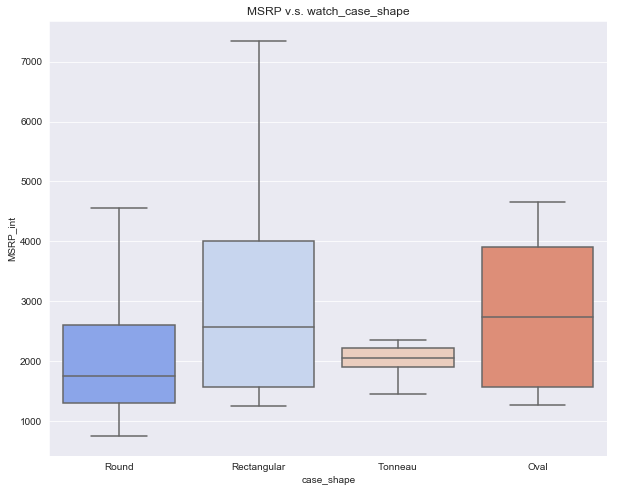

In [392]:
fig, ax = plt.subplots(figsize = (10, 8))
plt.title('MSRP v.s. watch_case_shape')
sns.boxplot(ax=ax, x='case_shape', y='MSRP_int', data=complete_watches, palette='coolwarm', showfliers=False)

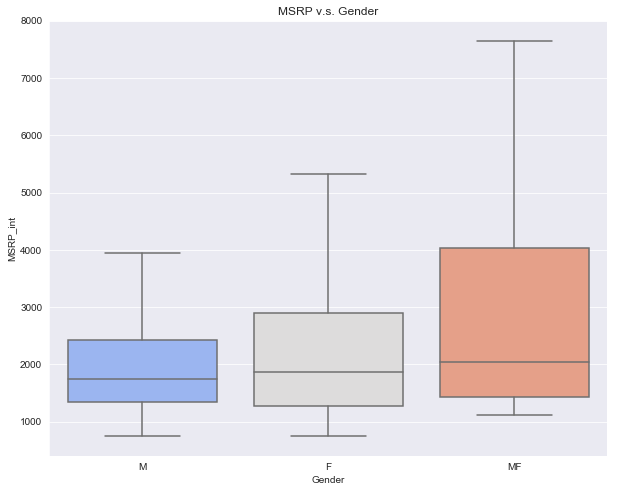

In [11]:
fig, ax = plt.subplots(figsize = (10, 8))
plt.title('MSRP v.s. Gender')
sns.boxplot(ax=ax, x='Gender', y='MSRP_int', data=complete_watches, palette='coolwarm', showfliers=False)
plt.show()

## Now, do watch price correlate with watch size? Since watch size is expressed in text of differing forms, we need to convert watch case dimensions to areas.

In [64]:
case_area_list = []
for case_dimension in complete_watches['case_dimension']:
    raw_num_format = case_dimension.replace('Ø', '').replace(' ', '').replace('m','')
    if 'X' not in raw_num_format:
        case_area = int(np.pi * float(raw_num_format) ** 2)
    else:
        case_area = int(float(raw_num_format.split('X')[0]) * float(raw_num_format.split('X')[1]))
    case_area_list.append(case_area)
    
complete_watches['case_area'] = case_area_list
complete_watches

,Model,Name,MSRP,case_shape,case_material,case_glass,case_case_back,case_dimension,case_water_resistance,dial_color,...,mvt_fct_type,mvt_fct_calibre_name,mvt_fct_calibre,mvt_fct_functions,bracelet_material,bracelet_buckle,URL,MSRP_int,Gender,case_area
0,l4.974.4.11.6,Flagship,"$ 1,600.00",Round,Stainless steel,"Scratch-resistant sapphire crystal, with sever...",Transparent case back with sapphire crystal,Ø 38.50 mm,Water-resistant to 3 bar,White matt,...,Automatic,L619/888,Self winding mechanical movement beating at 25...,"Hours, minutes, seconds and date",Stainless steel,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/flagship/l4-9...,1600,M,4656
1,l4.908.4.97.6,La Grande Classique de Longines,"$ 1,875.00",Round,Stainless steel,Scratch-resistant sapphire crystal,Transparent case back with sapphire crystal,Ø 36.00 mm,Water-resistant to 3 bar,Sunray blue,...,Automatic,L591,Self winding mechanical movement beating at 28...,Hours and minutes,Stainless steel,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/grande-classi...,1875,M,4071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,l4.512.1.91.7,La Grande Classique de Longines,"$ 1,300.00",Round,Red PVD coating,Scratch-resistant sapphire crystal,-,Ø 29.00 mm,Water-resistant to 3 bar,White,...,Quartz,L420,-,Hours and minutes,Stainless steel and red PVD coating,With triple safety folding clasp and push-piec...,https://www.longines.com/watches/grande-classi...,1300,MF,2642
1509,l4.512.1.91.2,La Grande Classique de Longines,"$ 1,250.00",Round,Red PVD coating,Scratch-resistant sapphire crystal,-,Ø 29.00 mm,Water-resistant to 3 bar,White,...,Quartz,L420,-,Hours and minutes,Alligator strap,With buckle,https://www.longines.com/watches/grande-classi...,1250,MF,2642


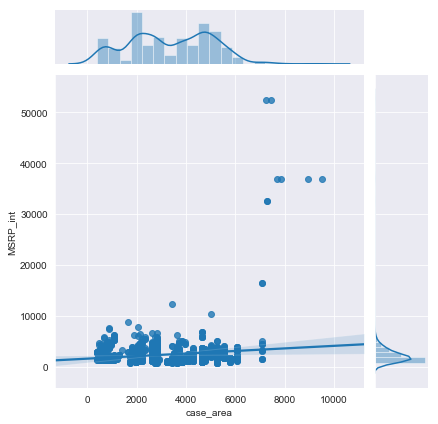

In [1162]:
sns.jointplot(x='case_area', y='MSRP_int', data=complete_watches, kind='reg')

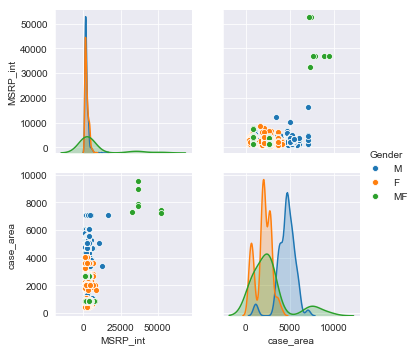

In [418]:
sns.pairplot(complete_watches, hue='Gender')

## No linear correlation between watch MSRP & watch size, unless possibly for unisex watches.

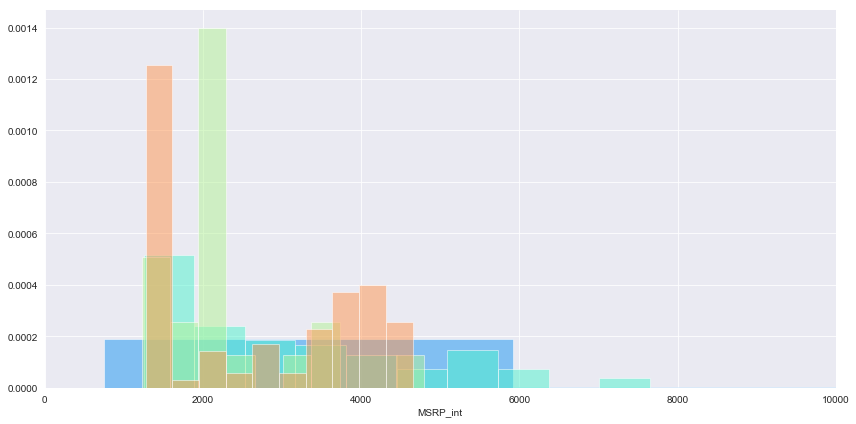

In [1168]:
sns.set_style('darkgrid')
g = sns.FacetGrid(complete_watches, hue='case_shape', palette='rainbow', height=6, aspect=2, xlim=(0, 10000))
g = g.map(plt.hist, 'MSRP_int', density=True, alpha=0.5)
g = g.add_legend(legend_data=complete_watches['case_shape'])

## Given the information above, we should only select watch parameters that are sensible for machine learning.

In [821]:
chosen_comp_parameters = ['case_shape',
                         'case_material',
                         'case_glass',
                         'case_water_resistance',
                         'dial_hands',
                         'mvt_fct_type',
                         'bracelet_material',
                         'bracelet_buckle',
                         'Gender']
get_dummies = pd.get_dummies(complete_watches[chosen_comp_parameters], prefix=chosen_comp_parameters, prefix_sep='_')

## Now, we process the input data set further, including making an one-hot label encoding.

In [889]:
process_table = pd.concat([complete_watches[['MSRP_int', 'case_area']], get_dummies], axis=1)
process_table.reset_index(drop=True, inplace=True)
print(process_table.shape)
process_table.head(10)

(1510, 60)


,MSRP_int,case_area,case_shape_Oval,case_shape_Rectangular,case_shape_Round,case_shape_Tonneau,case_material_18 karat pink gold,case_material_18 karat yellow gold,case_material_Black PVD coating,case_material_Red PVD coating,...,bracelet_material_Yellow PVD coating,bracelet_buckle_-,bracelet_buckle_With buckle,bracelet_buckle_With double safety folding clasp and integrated diving extension,bracelet_buckle_With double safety folding clasp and push-piece opening mechanism,bracelet_buckle_With triple safety folding clasp,bracelet_buckle_With triple safety folding clasp and push-piece opening mechanism,Gender_F,Gender_M,Gender_MF
0,1600,4656,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1875,4071,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1875,4071,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1650,4071,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1450,4300,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
5,1300,4300,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
6,1500,3421,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,1500,3421,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8,1400,3421,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9,1400,3421,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Drop outlier rows.

In [925]:
process_table.drop((process_table[process_table['MSRP_int'] > 10000]).index, inplace=True)
process_table.drop(list(process_table.filter(regex='_-')), axis=1, inplace=True)
print(process_table.shape)
process_table.head(10)

(1498, 57)


,MSRP_int,case_area,case_shape_Oval,case_shape_Rectangular,case_shape_Round,case_shape_Tonneau,case_material_18 karat pink gold,case_material_18 karat yellow gold,case_material_Black PVD coating,case_material_Red PVD coating,...,bracelet_material_Stainless steel and yellow PVD coating,bracelet_material_Yellow PVD coating,bracelet_buckle_With buckle,bracelet_buckle_With double safety folding clasp and integrated diving extension,bracelet_buckle_With double safety folding clasp and push-piece opening mechanism,bracelet_buckle_With triple safety folding clasp,bracelet_buckle_With triple safety folding clasp and push-piece opening mechanism,Gender_F,Gender_M,Gender_MF
0,1600,4656,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1875,4071,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1875,4071,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1650,4071,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1450,4300,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
5,1300,4300,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
6,1500,3421,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,1500,3421,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8,1400,3421,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9,1400,3421,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Plot histogram to ensure outliers are deleted.

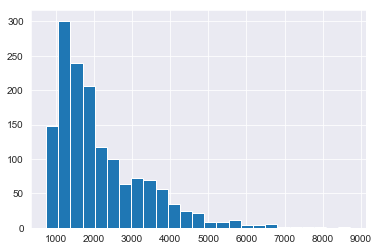

In [926]:
plt.hist(process_table['MSRP_int'], bins=25)
plt.show()

## Use simple linear regression for initial pass. The goal is to develop a formula to guess the MSRP's set by Longines on its watches.

In [946]:
y = process_table['MSRP_int']
X = process_table.drop(['MSRP_int', 'case_area'], axis=1)
# Sweep through 5000 random states for quick screening (later found out that random_state = 443 or 7547 is quite good):
random_state_tracker = {}
random_state_list = []
mae_list = []
rmse_list = []
pbar = tqdm(total = 5000)
pbar.set_description_str('Searching in progress.')
for i in range(5000, 10001):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    mae = int(metrics.mean_absolute_error(y_test, predictions))
    rmse = int(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    random_state_list.append(i)
    mae_list.append(mae)
    rmse_list.append(rmse)
    random_state_tracker[i] = {'MAE': mae, 'RMSE': rmse}
    pbar.update(1)

pbar.close()
# get best random state:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state_list[np.argmin(rmse_list)])
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
mae = int(metrics.mean_absolute_error(y_test, predictions))
rmse = int(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Best Random State: ', random_state_list[np.argmin(rmse_list)])
print('MAE: ' +  str(mae) + ' | RMSE: ' + str(rmse))

Best Random State:  7547
MAE: 488 | RMSE: 685


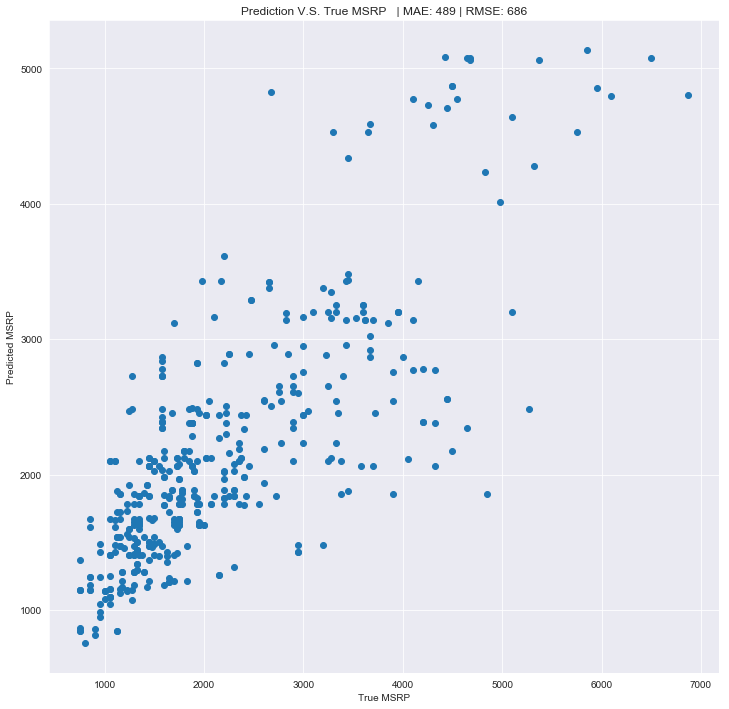

In [1169]:
plt.figure(figsize=(12, 12))
plt.title('Prediction V.S. True MSRP   | MAE: ' +  str(mae) + ' | RMSE: ' + str(rmse))
plt.scatter(y_test, predictions)
plt.xlabel('True MSRP')
plt.ylabel('Predicted MSRP')
plt.show()

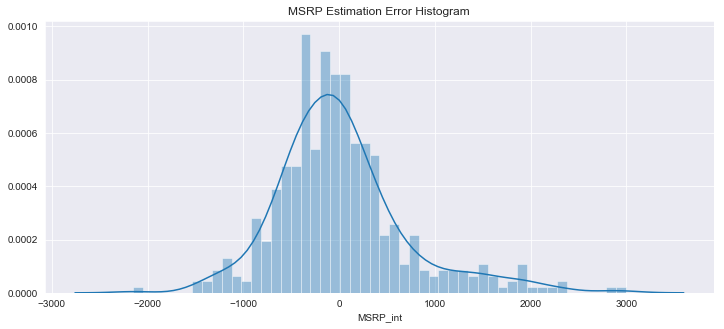

In [1170]:
plt.figure(figsize=(12, 5))
plt.title('MSRP Estimation Error Histogram')
sns.distplot((y_test - predictions),bins=50)
plt.show()

In [1149]:
attributes = [i.rsplit('_', 1)[0] for i in list(match_coefficients.keys())]
coefficients = list(match_coefficients.values())
attribute_table = pd.DataFrame(list(zip(attributes, coefficients, match_coefficients.keys())), columns=['Attribute', 'Coefficient', 'Detailed Attribute'])
attribute_means = attribute_table.groupby('Attribute').mean().sort_values(by='Coefficient', ascending=False).rename(columns={'Coefficient': 'Coef_avg'})
attribute_stds = attribute_table.groupby('Attribute').std().sort_values(by='Coefficient', ascending=False).rename(columns={'Coefficient': 'Coef_std'})
attribute_summary = attribute_means.merge(attribute_stds, how='right', on='Attribute')
attribute_summary


,Coef_avg,Coef_std
Attribute,,
case_material,1.142738e+16,3.381601e+15
case_glass,6.166555e+15,5.418046e+02
dial_hands,2.708729e+15,2.074999e+02
mvt_fct_type,2.589078e+15,3.780923e+02
bracelet_buckle,-1.032007e+15,6.606045e+02
bracelet_material,-2.669152e+15,2.688202e+15
case_shape,-2.878234e+15,4.284557e+02
case_water_resistance,-5.956718e+15,2.827499e+02
Gender,-1.090992e+16,2.429033e+02


## Looks like amongst these variables, watch case material is a main driver of MSRP.

In [1148]:
dummy_parameters = [i for i in list(process_table.drop(['MSRP_int', 'case_area'], axis=1).columns)]
match_coefficients = dict(zip(dummy_parameters, lm.coef_))

In [1146]:
def estimate_price (case_shape,
                    case_material,
                    case_glass,
                    case_water_resistance,
                    dial_hands,
                    mvt_fct_type,
                    bracelet_material,
                    bracelet_buckle,
                    gender):
    inputs = [case_shape, case_material, case_glass, case_water_resistance, dial_hands, mvt_fct_type, bracelet_material, bracelet_buckle, gender]

    estimated_msrp = 0
    for i in inputs:
        for key, value in match_coefficients.items():
            if key == i:
                estimated_msrp += value

    print('Such a watch is likely to be assigned a MSRP of $', estimated_msrp, ' by Longines. \n')
    print('Attributes: ')
    for i in inputs:
        print(' --', i.rsplit('_', 1)[0], ': ', i.rsplit('_', 1)[1])


# -
# -
# -
# -
# Estimate some Longines watch prices:

In [1147]:
estimate_price(case_shape = 'case_shape_Round',
               case_material = 'case_material_Stainless steel',
               case_glass = 'case_glass_Scratch-resistant sapphire crystal, with several layers of anti-reflective coating on the underside',
               case_water_resistance = 'case_water_resistance_Water-resistant to 3 bar',
               dial_hands = 'dial_hands_Silvered polished hands',
               mvt_fct_type = 'mvt_fct_type_Quartz',
               bracelet_material = 'bracelet_material_Stainless steel',
               bracelet_buckle = 'bracelet_buckle_With triple safety folding clasp and push-piece opening mechanism',
               gender = 'Gender_M')


Such a watch is likely to be assigned a MSRP of $ 1770.0  by Longines. 

Attributes: 
 -- case_shape :  Round
 -- case_material :  Stainless steel
 -- case_glass :  Scratch-resistant sapphire crystal, with several layers of anti-reflective coating on the underside
 -- case_water_resistance :  Water-resistant to 3 bar
 -- dial_hands :  Silvered polished hands
 -- mvt_fct_type :  Quartz
 -- bracelet_material :  Stainless steel
 -- bracelet_buckle :  With triple safety folding clasp and push-piece opening mechanism
 -- Gender :  M


In [1181]:
estimate_price(case_shape = 'case_shape_Round',
               case_material = 'case_material_Stainless steel',
               case_glass = 'case_glass_Scratch-resistant sapphire crystal',
               case_water_resistance = 'case_water_resistance_Water-resistant to 3 bar',
               dial_hands = 'dial_hands_Black hands',
               mvt_fct_type = 'mvt_fct_type_Automatic',
               bracelet_material = 'bracelet_material_Stainless steel',
               bracelet_buckle = 'bracelet_buckle_With triple safety folding clasp and push-piece opening mechanism',
               gender = 'Gender_F')


Such a watch is likely to be assigned a MSRP of $ 1970.0  by Longines. 

Attributes: 
 -- case_shape :  Round
 -- case_material :  Stainless steel
 -- case_glass :  Scratch-resistant sapphire crystal
 -- case_water_resistance :  Water-resistant to 3 bar
 -- dial_hands :  Black hands
 -- mvt_fct_type :  Automatic
 -- bracelet_material :  Stainless steel
 -- bracelet_buckle :  With triple safety folding clasp and push-piece opening mechanism
 -- Gender :  F


In [1192]:
estimate_price(case_shape = 'case_shape_Rectangular',
               case_material = 'case_material_Red PVD coating',
               case_glass = 'case_glass_Scratch-resistant sapphire crystal',
               case_water_resistance = 'case_water_resistance_Water-resistant to 3 bar',
               dial_hands = 'dial_hands_Gilt hands',
               mvt_fct_type = 'mvt_fct_type_Automatic',
               bracelet_material = 'bracelet_material_Stainless steel and yellow PVD coating',
               bracelet_buckle = 'bracelet_buckle_With triple safety folding clasp and push-piece opening mechanism',
               gender = 'Gender_M')


Such a watch is likely to be assigned a MSRP of $ 2186.0  by Longines. 

Attributes: 
 -- case_shape :  Rectangular
 -- case_material :  Red PVD coating
 -- case_glass :  Scratch-resistant sapphire crystal
 -- case_water_resistance :  Water-resistant to 3 bar
 -- dial_hands :  Gilt hands
 -- mvt_fct_type :  Automatic
 -- bracelet_material :  Stainless steel and yellow PVD coating
 -- bracelet_buckle :  With triple safety folding clasp and push-piece opening mechanism
 -- Gender :  M


In [1210]:
estimate_price(case_shape = 'case_shape_Tonneau',
               case_material = 'case_material_18 karat pink gold',
               case_glass = 'case_glass_Scratch-resistant sapphire crystal, with several layers of anti-reflective coating on the underside',
               case_water_resistance = 'case_water_resistance_Water-resistant to 3 bar',
               dial_hands = 'dial_hands_Silvered sandy hands',
               mvt_fct_type = 'mvt_fct_type_Automatic',
               bracelet_material = 'bracelet_material_Alligator strap',
               bracelet_buckle = 'bracelet_buckle_With triple safety folding clasp and push-piece opening mechanism',
               gender = 'Gender_F')


Such a watch is likely to be assigned a MSRP of $ 5022.0  by Longines. 

Attributes: 
 -- case_shape :  Tonneau
 -- case_material :  18 karat pink gold
 -- case_glass :  Scratch-resistant sapphire crystal, with several layers of anti-reflective coating on the underside
 -- case_water_resistance :  Water-resistant to 3 bar
 -- dial_hands :  Silvered sandy hands
 -- mvt_fct_type :  Automatic
 -- bracelet_material :  Alligator strap
 -- bracelet_buckle :  With triple safety folding clasp and push-piece opening mechanism
 -- Gender :  F


## For reference, the last watch appraised is similar to this one: https://www.longines.com/watches/evidenza/l2-142-8-73-2 which has MSRP of \\$4,800. Not bad that the algorithm predicted \\$5,022!